## **Librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import imdb
from keras import models, layers, optimizers

In [3]:
from sklearn.metrics import confusion_matrix, classification_report

### **Datos**

In [4]:
# Traemos los datos
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 2s 0us/step


In [5]:
# Tokenizamos nuestras palabras
word_index = imdb.get_word_index()
word_index = dict([(value, key) for (key, value) in word_index.items()])

1641221/1641221 [==============================] - 0s 0us/step


In [6]:
def vectorizar(sequences, dim=10000):
  results = np.zeros((len(sequences), dim))
  for i, sequences in enumerate(sequences):
    results[i, sequences] = 1
  return results

In [7]:
# Vectorizamos nuestras bases
X_train = vectorizar(train_data)
X_test = vectorizar(test_data)

In [8]:
# Ajustamos nuestros labels para que queden en formato decimal
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### **Red Neuronal**

#### **Configuramos el modelo**

In [9]:
# Inicializamos nuestro modelo
model = models.Sequential()

In [10]:
# Creamos nuestras capas
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
# Compilamos nuestro modelo
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

In [12]:
# Separamos nuestra basesde en testeo y validación
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### **Entrenamos el modelo**

In [13]:
history = model.fit(
    partial_X_train, 
    partial_y_train,
    epochs=5,
    batch_size=512,
    validation_data=(X_val,y_val)
)

Epoch 1/5
30/30 [==============================] - 4s 42ms/step - loss: 0.5221 - acc: 0.7845 - val_loss: 0.3949 - val_acc: 0.8675
Epoch 2/5
30/30 [==============================] - 1s 21ms/step - loss: 0.3123 - acc: 0.9005 - val_loss: 0.3150 - val_acc: 0.8804
Epoch 3/5
30/30 [==============================] - 1s 21ms/step - loss: 0.2290 - acc: 0.9262 - val_loss: 0.2866 - val_acc: 0.8849
Epoch 4/5
30/30 [==============================] - 1s 24ms/step - loss: 0.1801 - acc: 0.9415 - val_loss: 0.2810 - val_acc: 0.8864
Epoch 5/5
30/30 [==============================] - 1s 20ms/step - loss: 0.1461 - acc: 0.9533 - val_loss: 0.2826 - val_acc: 0.8852


#### **Evaluación del modelo**

In [14]:
# Guardamos los resultados de la perdida del modelo en entrenamiento y validación
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epoch = range(1, len(loss_values) + 1)

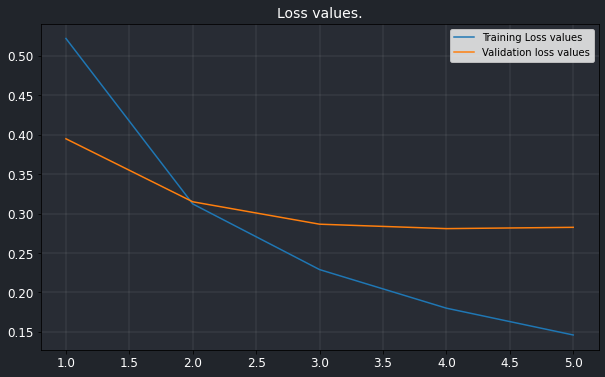

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.title('Loss values.', size=14, color='white')
plt.grid(visible=True, linewidth=0.1, color='white')

fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

plt.plot(epoch, loss_values, label='Training Loss values')
plt.plot(epoch, val_loss_values, label='Validation loss values')

plt.xticks(color='white', size=12)
plt.yticks(color='white', size=12)

plt.legend()

plt.show()

In [16]:
model.evaluate(X_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.3010 - acc: 0.8793


[0.30095458030700684, 0.8792799711227417]

In [17]:
y_pred = model.predict(X_test)

782/782 [==============================] - 1s 2ms/step


In [18]:
y_pred = np.where(y_pred>0.5, 1, 0)

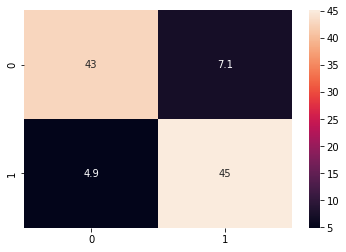

In [19]:
sns.heatmap(confusion_matrix(y_test, y_pred)/len(y_test)*100, annot=True)
plt.show()

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88     12500
         1.0       0.86      0.90      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000

